In [30]:
!pip install matplotlib deap

In [31]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from deap import base,creator,tools,algorithms

In [32]:
num_locations=15
locations=[(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]
depot=(50,40)
num_vehicles=3

In [33]:
creator.create("FitnessMin",base.Fitness,weights=(-1.0,-1.0))
creator.create("Individual",list,fitness=creator.FitnessMin)

In [34]:
toolbox=base.Toolbox()
toolbox.register("indices",random.sample,range(num_locations),num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)

In [35]:
def evalVRP(individual):
  total_dis=0
  distances=[]
  for i in range(num_vehicles):
    vehicle_route=[depot]+[locations[individual[j]] for j in range(i,len(individual),num_vehicles)]+[depot]
    current_location = depot
    for k in range(len(vehicle_route) - 1):
      location = vehicle_route[k + 1]
      dis = np.sqrt((current_location[0] - location[0])**2 + (current_location[1] - location[1])**2)
      total_dis += dis
      distances.append(dis)
      current_location = location
  sd=np.std(distances)
  return total_dis,sd
toolbox.register("evaluate",evalVRP)

In [36]:
toolbox.register("mate",tools.cxPartialyMatched)
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.05)
toolbox.register("select",tools.selRoulette)

In [37]:
def plot_routes(individual, title="Optimal Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	100   	364.048	9.58439
1  	81    	364.31 	9.58439
2  	81    	359.582	11.1896
3  	75    	365.648	12.7768
4  	80    	369.211	9.92244
5  	70    	367.461	14.3205
6  	71    	366.809	12.4939
7  	71    	370.568	12.4939
8  	89    	371.173	10.679 
9  	77    	365.326	12.7227
10 	79    	364.938	13.6363
11 	74    	363.143	10.9921
12 	75    	365.538	11.5319
13 	75    	363.1  	13.1938
14 	76    	361.988	12.5111
15 	84    	364.991	11.8692
16 	83    	367.795	11.0105
17 	75    	369.986	11.0105
18 	68    	370.827	11.0105
19 	78    	372.981	11.0105
20 	78    	368.478	11.0105
21 	70    	370.723	11.0105
22 	75    	373.306	10.9493
23 	80    	366.611	13.953 
24 	66    	363.608	14.1502
25 	80    	366.661	11.3349
26 	76    	364.451	12.189 
27 	73    	368.109	12.8627
28 	80    	367.529	11.9805
29 	84    	363.828	10.8757
30 	77    	370.336	9.68955


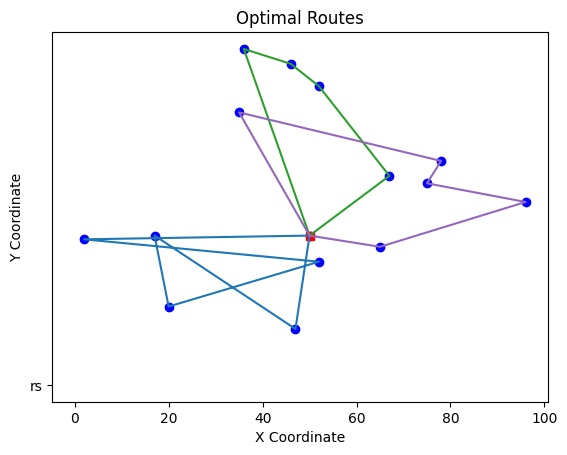

In [38]:
def main():
  random.seed(42)
  pop=toolbox.population(n=100)
  hof=tools.HallOfFame(1)
  stats=tools.Statistics(lambda ind:ind.fitness.values)
  stats.register("avg",np.mean)
  stats.register("min",np.min)
  algorithms.eaSimple(pop,toolbox,0.7,0.2,30,stats=stats,halloffame=hof)
  plot_routes(hof[0])
  return pop,stats,hof
if __name__=="__main__":
  main()